### Лаборотрна робота 1 
#### Алгоритми однофакторного і двох факторного дисперсійного аналізу
###### Верзун Поліни КМ-81

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, kruskal, friedmanchisquare

In [18]:
data = pd.read_csv('A2.txt', sep=',', header=None) #download data from file
data.rename(lambda x: 'A' + str(x+1), axis='columns', inplace = True) #add headers to our data
data.head(10) #print 10 first rows of our data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
0,8.73880,27.010,27.586,-10.3690,8.8737,32.017,-45.018,-90.659,-67.589,-21.03700,-20.9840,-3.0658
1,6.39440,31.640,34.464,-11.8930,4.3735,37.262,-41.993,-83.026,-64.328,-8.82700,-8.6840,2.3401
2,3.25520,34.654,40.521,-12.1620,-0.1875,41.410,-39.640,-76.410,-61.810,1.06310,1.9389,7.2732
3,-0.66531,35.319,45.010,-10.7890,-4.4797,43.787,-38.320,-71.592,-60.428,6.92970,9.6142,11.3160
4,-4.31390,34.163,47.405,-8.5721,-7.7330,44.351,-37.997,-68.903,-60.073,8.15110,13.8110,14.2150
5,-6.34100,32.298,47.470,-6.7779,-9.1270,43.430,-38.300,-68.186,-60.284,5.21180,14.7270,15.8970
6,-6.10800,30.454,45.296,-6.1196,-8.3120,41.332,-38.741,-68.907,-60.591,-0.59757,13.0890,16.4000
7,-4.12580,28.483,41.246,-6.2775,-5.6357,38.149,-38.944,-70.367,-60.802,-7.62060,9.9045,15.8390
8,-1.64850,25.639,35.827,-6.2332,-1.9205,33.836,-38.760,-71.865,-61.046,-14.23100,6.2887,14.4890
9,0.14103,21.242,29.543,-5.0281,1.9808,28.412,-38.219,-72.792,-61.598,-19.11800,3.3256,12.8890


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

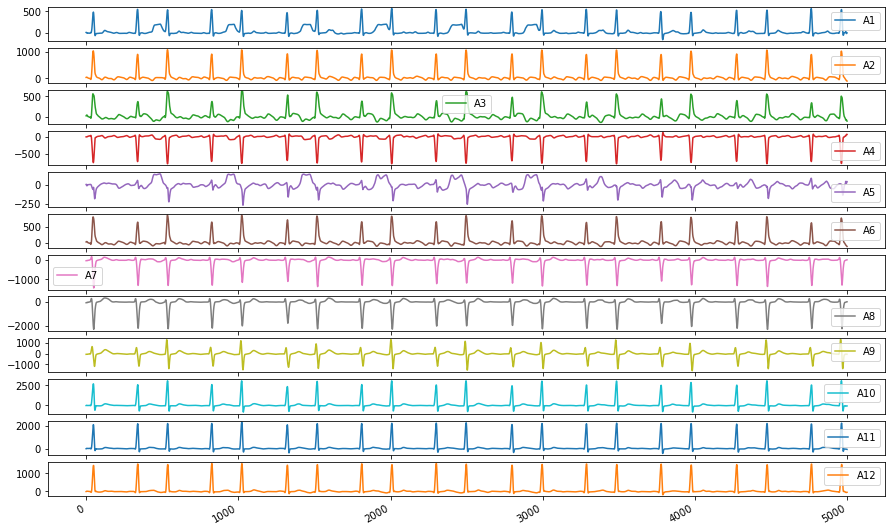

In [19]:
data.plot(subplots=True, figsize = (15,10)) #draw graphics for all the params

In [20]:
data.describe().loc['mean'] #Print mean

A1      42.852361
A2      57.761535
A3      32.907497
A4     -42.882280
A5       3.502065
A6      46.390951
A7     -66.993795
A8    -104.095522
A9     -10.152335
A10    126.216372
A11    106.495620
A12     78.373392
Name: mean, dtype: float64

In [21]:
data.describe().loc['std'] #Print standart deviation

A1     111.724632
A2     206.357295
A3     126.210988
A4     150.576600
A5      54.509079
A6     163.217830
A7     246.959358
A8     426.192389
A9     294.434168
A10    538.939879
A11    417.947628
A12    288.370353
Name: std, dtype: float64

In [22]:
data.var(axis = 0) #Print dispersion

A1      12482.393464
A2      42583.333379
A3      15929.213564
A4      22673.312558
A5       2971.239678
A6      26640.060125
A7      60988.924398
A8     181639.952147
A9      86691.479298
A10    290456.193179
A11    174680.219876
A12     83157.460261
dtype: float64

array([[<AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>],
       [<AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>],
       [<AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'A11'}>,
        <AxesSubplot:title={'center':'A12'}>]], dtype=object)

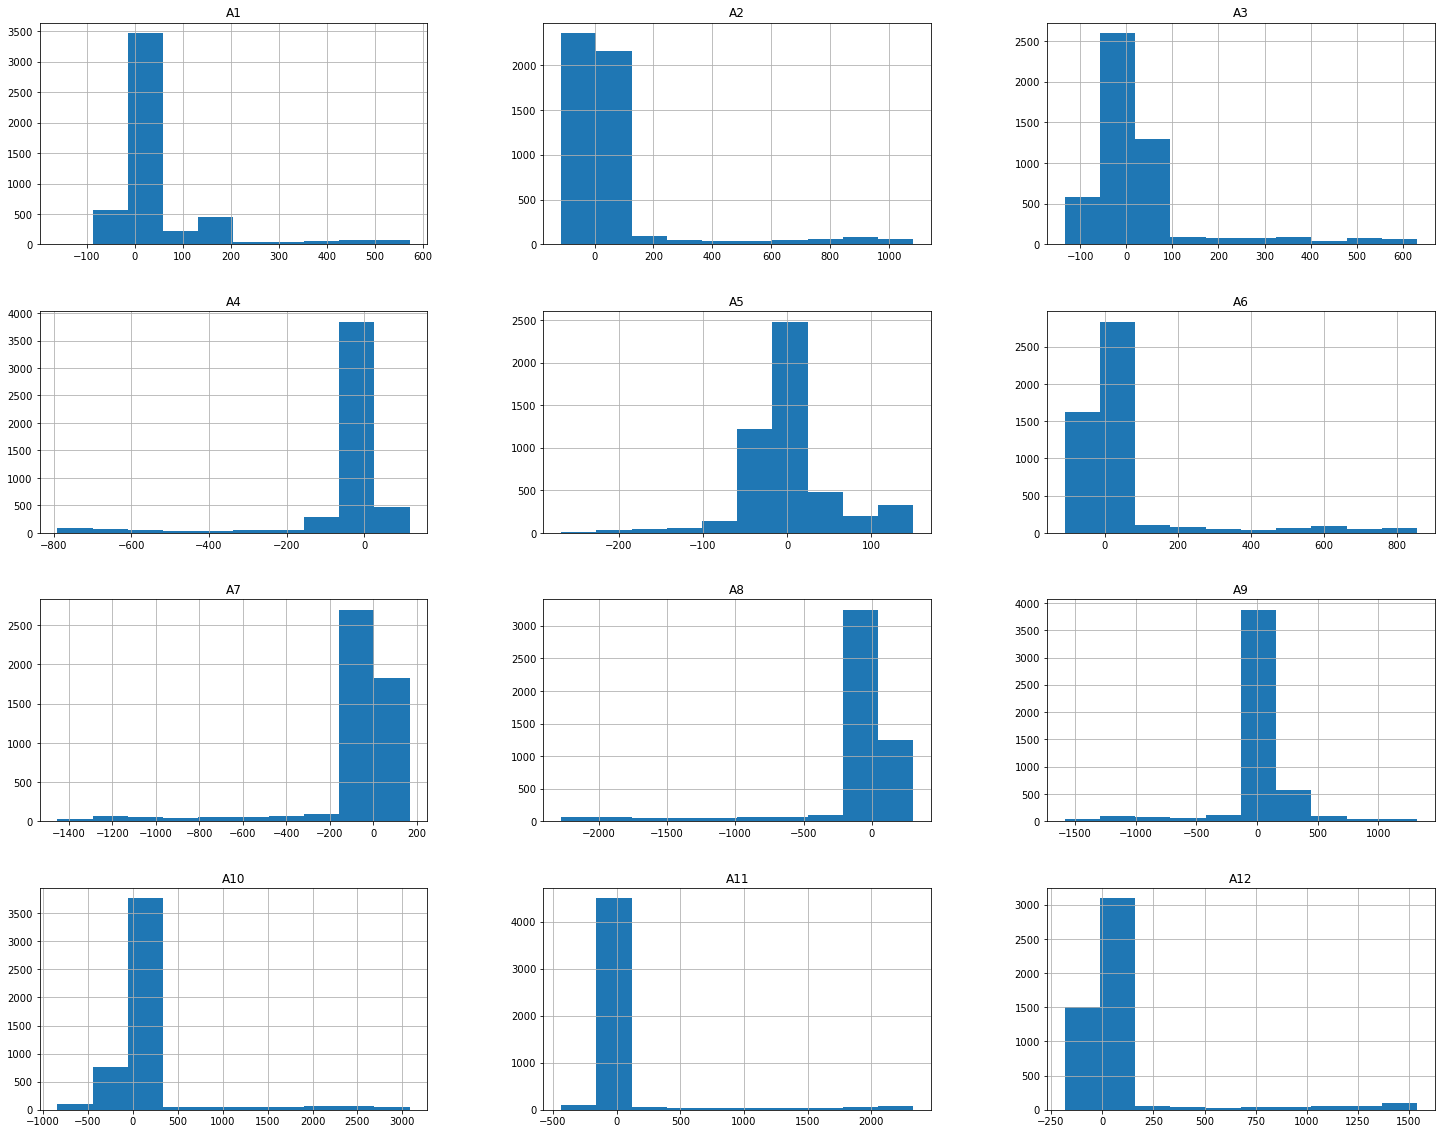

In [23]:
data.hist(figsize = (25,20)) #Print histograms

### Однофакторний аналіз

In [24]:
[shapiro(data[column]) for column in data.columns]

[(0.6047117710113525, 0.0),
 (0.4735032320022583, 0.0),
 (0.684103786945343, 0.0),
 (0.45148539543151855, 0.0),
 (0.9054632186889648, 0.0),
 (0.5421654582023621, 0.0),
 (0.4768570065498352, 0.0),
 (0.5195643901824951, 0.0),
 (0.6979967355728149, 0.0),
 (0.45445215702056885, 0.0),
 (0.38910549879074097, 0.0),
 (0.3867841958999634, 0.0)]

In [25]:
levene(*[data[column] for column in data.columns])

LeveneResult(statistic=178.38254574097462, pvalue=0.0)

#### p_value < 0.05 => дані не нормалізовані

In [26]:
kruskal(*[data[column] for column in data.columns])

KruskalResult(statistic=1670.3115032106007, pvalue=0.0)

#### фактор А значущий

### Двохфакторний аналіз

In [27]:
n = 1000
data.index = np.array([["B" + str(i)]*n for i in range(1,6)]).flatten().tolist()

In [28]:
data_2 = data.groupby(data.index).mean().round(5)
data_2

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
B1,48.00222,55.55157,28.52380,-44.21836,11.58828,43.78950,-68.07286,-99.62008,-4.45602,121.40777,101.63911,74.67810
B2,54.98850,55.21216,34.07072,-44.81350,7.81418,45.64775,-60.35153,-95.38970,-11.52816,122.05191,103.45683,74.49204
B3,60.52126,66.84114,39.74490,-49.49123,5.95148,54.12272,-73.35316,-117.53414,-5.28938,153.99066,124.18789,87.82976
B4,24.17361,57.90789,36.57340,-37.66269,-6.82449,48.28156,-68.26692,-108.00669,-27.61792,112.42429,100.91565,77.90315
B5,26.57621,53.29491,25.62466,-38.22563,-1.01913,40.11323,-64.92449,-99.92700,-1.87019,121.20724,102.27862,76.96391


In [29]:
[shapiro(data_2[column]) for column in data.columns]

[(0.8746740221977234, 0.2858690321445465),
 (0.8190164566040039, 0.1147422045469284),
 (0.9590328335762024, 0.8012327551841736),
 (0.9104613065719604, 0.4703677296638489),
 (0.9513176679611206, 0.746598482131958),
 (0.9816621541976929, 0.9433127045631409),
 (0.9742281436920166, 0.9016312956809998),
 (0.9068620800971985, 0.4489651024341583),
 (0.8205828666687012, 0.11798203736543655),
 (0.7540354132652283, 0.032423462718725204),
 (0.6409347057342529, 0.0020753087010234594),
 (0.7726645469665527, 0.047613438218832016)]

In [30]:
levene(*[data[column] for column in data.columns])

LeveneResult(statistic=178.38254574097462, pvalue=0.0)

In [31]:
friedmanchisquare(*[data_2[column] for column in data_2.columns])

FriedmanchisquareResult(statistic=54.60000000000002, pvalue=9.171838104586851e-08)

#### Вплив фактора А є значущим.

In [32]:
friedmanchisquare(*[data_2.T[column] for column in data_2.T.columns])

FriedmanchisquareResult(statistic=4.466666666666669, pvalue=0.3465182692991248)

#### Фактор B є значущим